<a href="https://www.kaggle.com/code/shivpalyadav/spaceship-titanic-by-shiv?scriptVersionId=168160152" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/spaceship-titanic/sample_submission.csv
/kaggle/input/spaceship-titanic/train.csv
/kaggle/input/spaceship-titanic/test.csv


In [2]:
# Remove warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Data wrangling
import pandas as pd
import numpy as np
import missingno
from collections import Counter


In [4]:
# Data visualisation
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
# Machine learning models
from sklearn.linear_model import LogisticRegression, Perceptron, SGDClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from catboost import CatBoostClassifier

In [6]:
# Model evaluation
from sklearn.model_selection import cross_val_score

In [7]:
# Hyperparameter tuning
from sklearn.model_selection import GridSearchCV

In [8]:
train = pd.read_csv("/kaggle/input/spaceship-titanic/train.csv")
test = pd.read_csv("/kaggle/input/spaceship-titanic/test.csv")
ss = pd.read_csv("/kaggle/input/spaceship-titanic/sample_submission.csv")

In [9]:
train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [10]:
test.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


In [11]:
ss.head()

,PassengerId,Transported
0,0013_01,False
1,0018_01,False
2,0019_01,False
3,0021_01,False
4,0023_01,False


In [12]:
train.info()
print('-'*45)
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB
---------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 13

In [13]:
# Missing data in training set by columns

train.isnull().sum().sort_values(ascending = False)

CryoSleep       217
ShoppingMall    208
VIP             203
HomePlanet      201
Name            200
Cabin           199
VRDeck          188
FoodCourt       183
Spa             183
Destination     182
RoomService     181
Age             179
PassengerId       0
Transported       0
dtype: int64

In [14]:
# Missing data in test set by columns

test.isnull().sum().sort_values(ascending = False)

FoodCourt       106
Spa             101
Cabin           100
ShoppingMall     98
Name             94
CryoSleep        93
VIP              93
Destination      92
Age              91
HomePlanet       87
RoomService      82
VRDeck           80
PassengerId       0
dtype: int64

<Axes: >

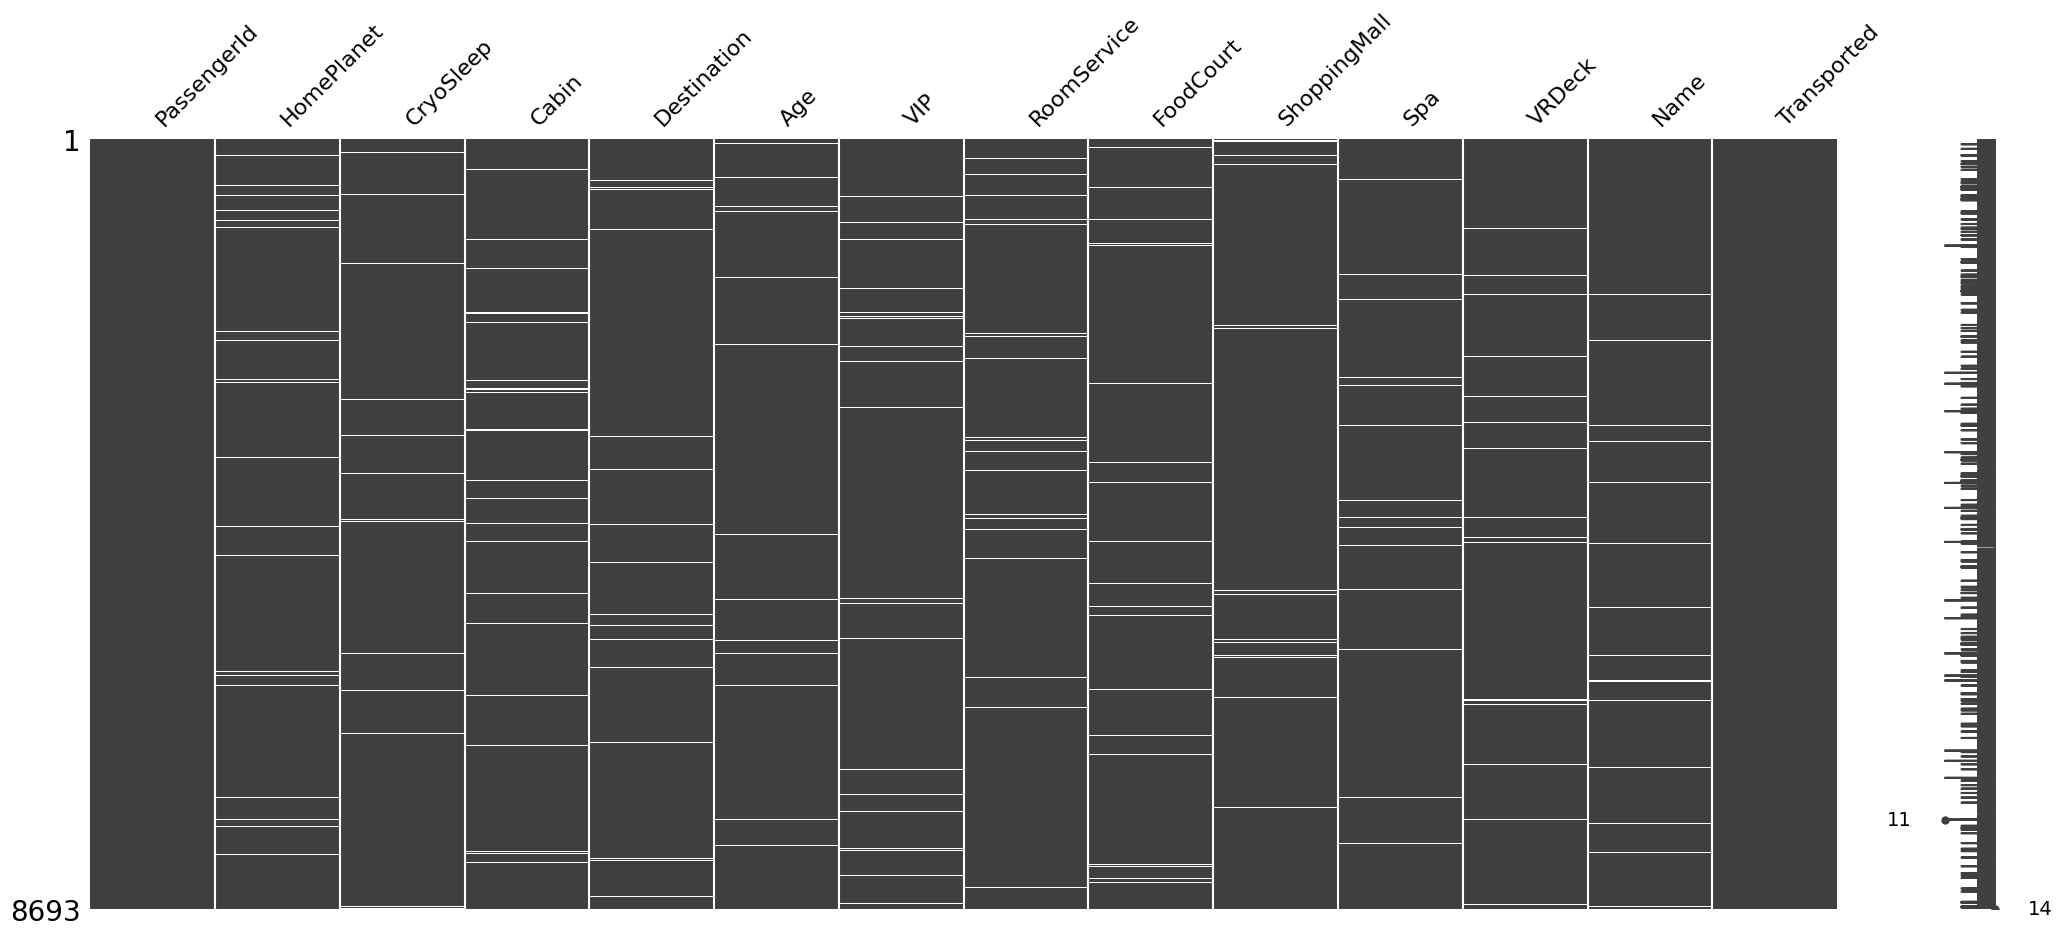

In [15]:
# Missing data in training set

missingno.matrix(train)


<Axes: >

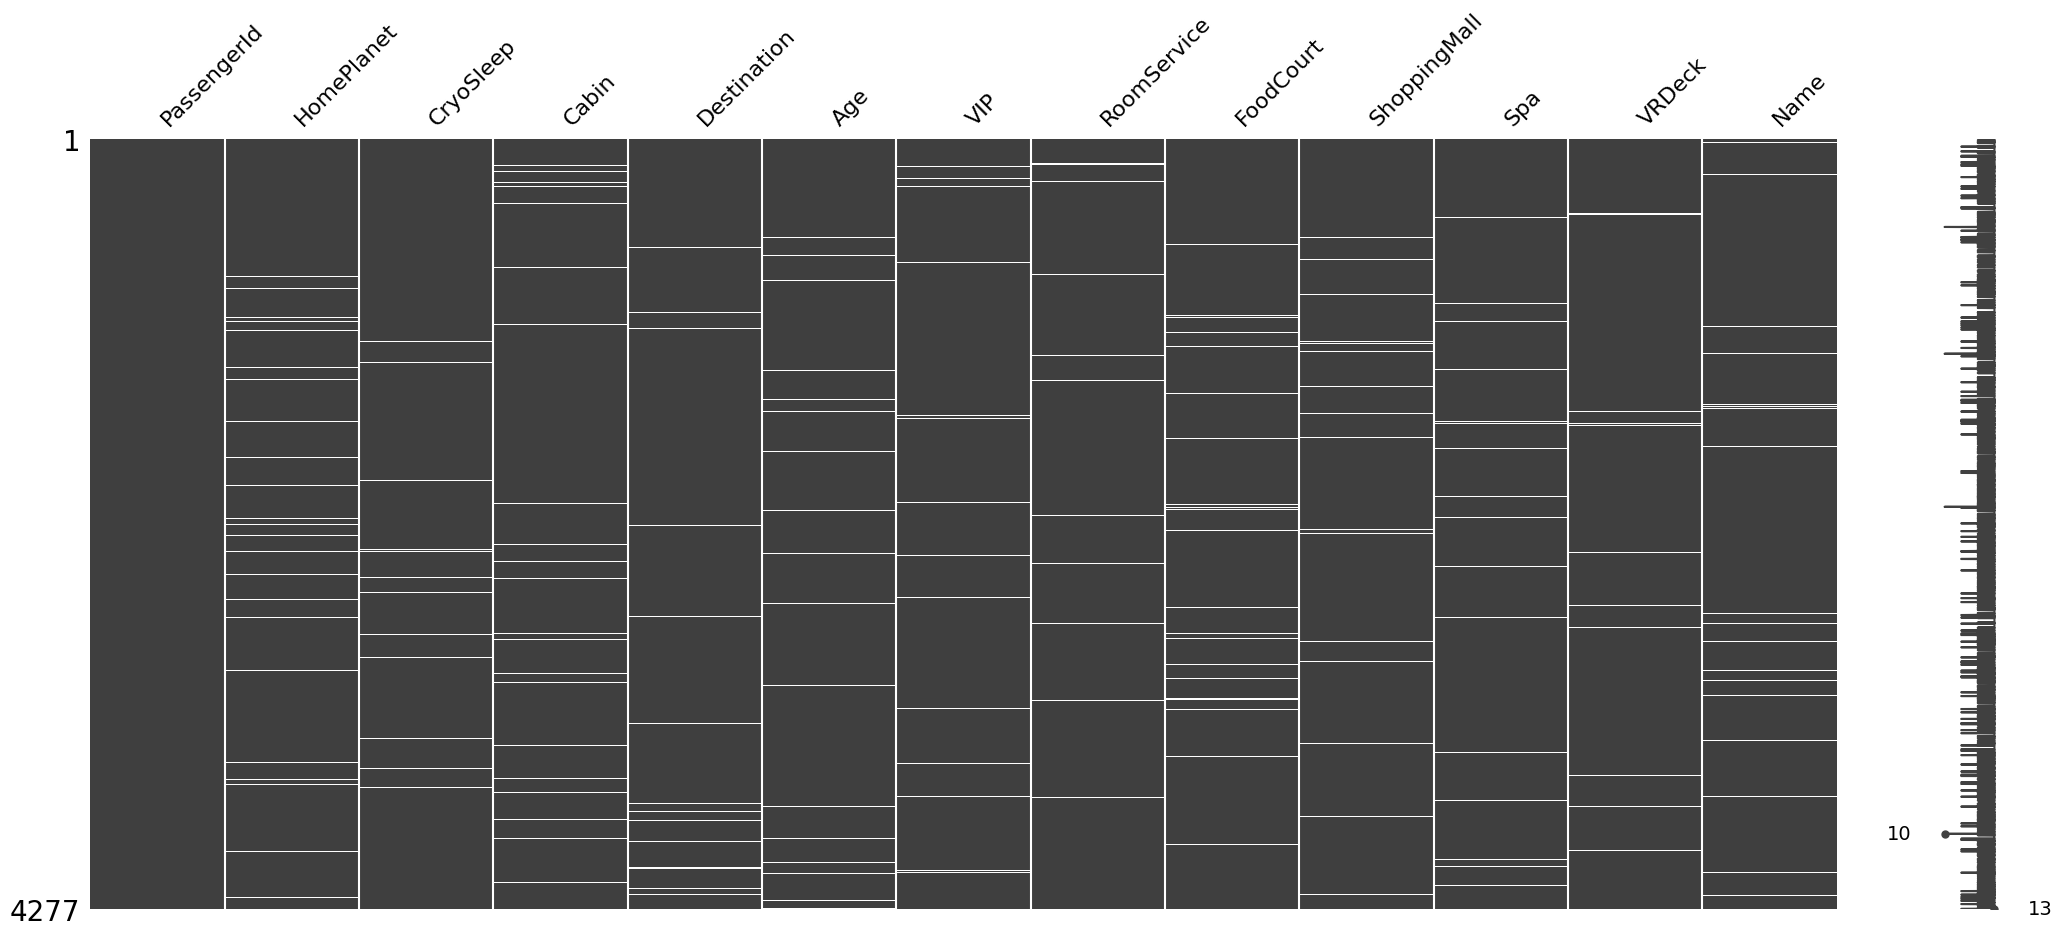

In [16]:
# Missing data in test set

missingno.matrix(test)

In [17]:
# Summary statistics for training set 

train.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [18]:
test.shape

(4277, 13)

In [19]:
train.shape

(8693, 14)

In [20]:
train.describe

<bound method NDFrame.describe of      PassengerId HomePlanet CryoSleep     Cabin    Destination   Age    VIP  \
0        0001_01     Europa     False     B/0/P    TRAPPIST-1e  39.0  False   
1        0002_01      Earth     False     F/0/S    TRAPPIST-1e  24.0  False   
2        0003_01     Europa     False     A/0/S    TRAPPIST-1e  58.0   True   
3        0003_02     Europa     False     A/0/S    TRAPPIST-1e  33.0  False   
4        0004_01      Earth     False     F/1/S    TRAPPIST-1e  16.0  False   
...          ...        ...       ...       ...            ...   ...    ...   
8688     9276_01     Europa     False    A/98/P    55 Cancri e  41.0   True   
8689     9278_01      Earth      True  G/1499/S  PSO J318.5-22  18.0  False   
8690     9279_01      Earth     False  G/1500/S    TRAPPIST-1e  26.0  False   
8691     9280_01     Europa     False   E/608/S    55 Cancri e  32.0  False   
8692     9280_02     Europa     False   E/608/S    TRAPPIST-1e  44.0  False   

      RoomService

In [21]:
train.describe

<bound method NDFrame.describe of      PassengerId HomePlanet CryoSleep     Cabin    Destination   Age    VIP  \
0        0001_01     Europa     False     B/0/P    TRAPPIST-1e  39.0  False   
1        0002_01      Earth     False     F/0/S    TRAPPIST-1e  24.0  False   
2        0003_01     Europa     False     A/0/S    TRAPPIST-1e  58.0   True   
3        0003_02     Europa     False     A/0/S    TRAPPIST-1e  33.0  False   
4        0004_01      Earth     False     F/1/S    TRAPPIST-1e  16.0  False   
...          ...        ...       ...       ...            ...   ...    ...   
8688     9276_01     Europa     False    A/98/P    55 Cancri e  41.0   True   
8689     9278_01      Earth      True  G/1499/S  PSO J318.5-22  18.0  False   
8690     9279_01      Earth     False  G/1500/S    TRAPPIST-1e  26.0  False   
8691     9280_01     Europa     False   E/608/S    55 Cancri e  32.0  False   
8692     9280_02     Europa     False   E/608/S    TRAPPIST-1e  44.0  False   

      RoomService

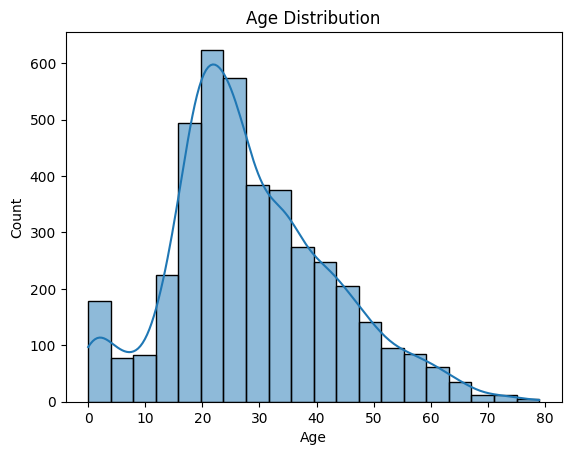

In [22]:
#Age distribution
sns.histplot(test['Age'].dropna(), bins=20, kde=True)
plt.title('Age Distribution')
plt.show()

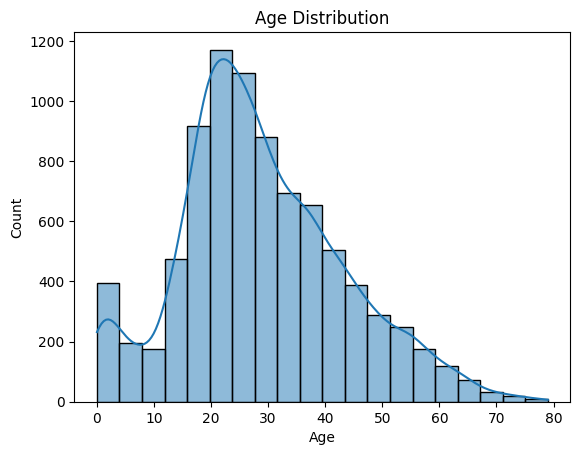

In [23]:
#Age distribution
sns.histplot(train['Age'].dropna(), bins=20, kde=True)
plt.title('Age Distribution')
plt.show()

In [24]:
train['Age'].isnull().sum()

179

In [25]:
test['Age'].isnull().sum()

91

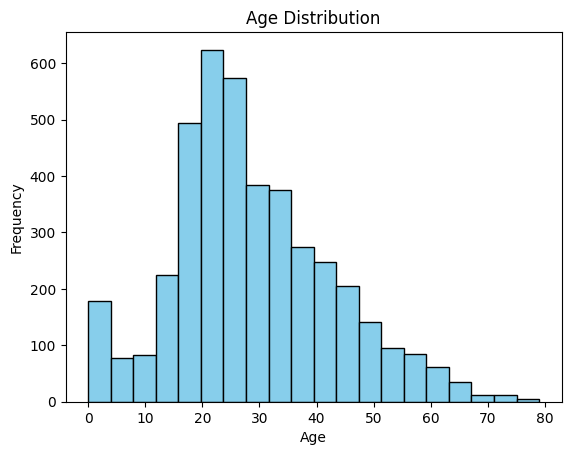

In [26]:
# Age distribution
plt.hist(test['Age'], bins=20, color=('skyblue'), edgecolor='black')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

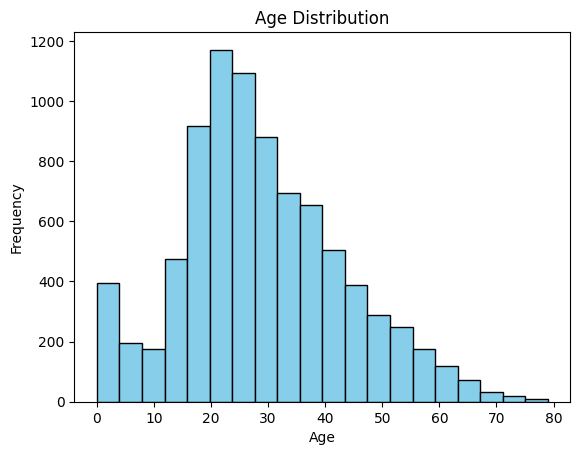

In [27]:
# Age distribution
plt.hist(train['Age'], bins=20, color=('skyblue'), edgecolor='black')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

In [28]:
categorical_columns = train.select_dtypes(include=['object']).columns
numerical_columns = train.select_dtypes(include=[np.number]).columns

In [29]:
for col in categorical_columns:
    print(f"Unique values in '{col}':")
    print(train[col].unique())
    print("\n")

Unique values in 'PassengerId':
['0001_01' '0002_01' '0003_01' ... '9279_01' '9280_01' '9280_02']


Unique values in 'HomePlanet':
['Europa' 'Earth' 'Mars' nan]


Unique values in 'CryoSleep':
[False True nan]


Unique values in 'Cabin':
['B/0/P' 'F/0/S' 'A/0/S' ... 'G/1499/S' 'G/1500/S' 'E/608/S']


Unique values in 'Destination':
['TRAPPIST-1e' 'PSO J318.5-22' '55 Cancri e' nan]


Unique values in 'VIP':
[False True nan]


Unique values in 'Name':
['Maham Ofracculy' 'Juanna Vines' 'Altark Susent' ... 'Fayey Connon'
 'Celeon Hontichre' 'Propsh Hontichre']




In [30]:
for col in numerical_columns:
    unique_values = train[col].nunique()
    print(f"Unique values in '{col}': {unique_values}")


Unique values in 'Age': 80
Unique values in 'RoomService': 1273
Unique values in 'FoodCourt': 1507
Unique values in 'ShoppingMall': 1115
Unique values in 'Spa': 1327
Unique values in 'VRDeck': 1306


In [31]:
num_duplicate_rows_train = train.duplicated().sum()
print("Number of duplicate values in train DataFrame:", num_duplicate_rows_train)

Number of duplicate values in train DataFrame: 0


In [32]:
num_duplicate_rows_test = test.duplicated().sum()
print("Number of duplicate values in test DataFrame:", num_duplicate_rows_test)

Number of duplicate values in test DataFrame: 0


In [33]:
missingValuesTrain = train.isnull().sum()
print("Number of missing values in each column of train DataFrame:")
print(missingValuesTrain)

Number of missing values in each column of train DataFrame:
PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64


In [34]:
missingValuesTest = test.isnull().sum()
print("Number of missing values in each column of test DataFrame:")
print(missingValuesTest)

Number of missing values in each column of test DataFrame:
PassengerId       0
HomePlanet       87
CryoSleep        93
Cabin           100
Destination      92
Age              91
VIP              93
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
Name             94
dtype: int64


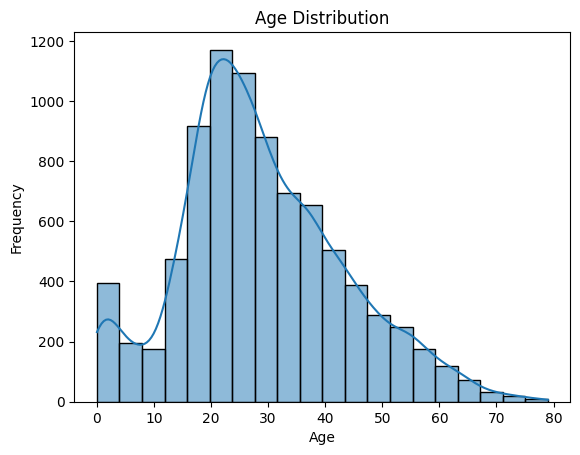

In [35]:
sns.histplot(train['Age'].dropna(), bins=20, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


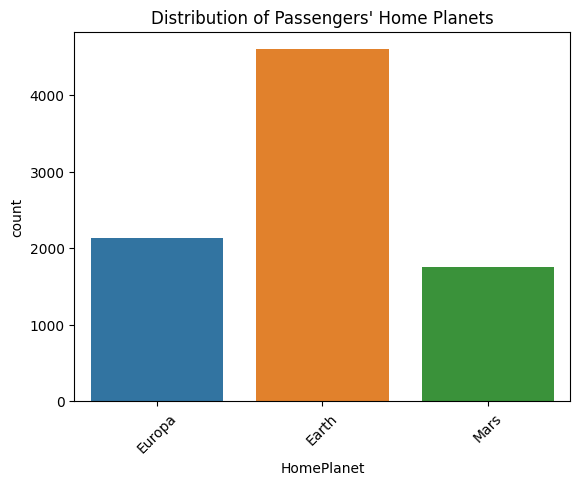

In [36]:
sns.countplot(data=train, x='HomePlanet')
plt.title('Distribution of Passengers\' Home Planets')
plt.xticks(rotation=45)
plt.show()


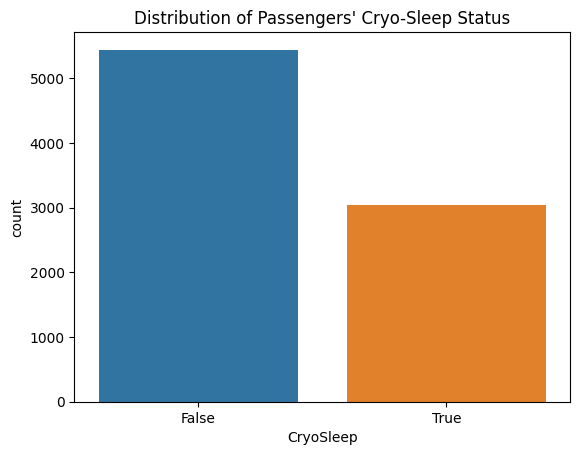

In [37]:
sns.countplot(data=train, x='CryoSleep')
plt.title('Distribution of Passengers\' Cryo-Sleep Status')
plt.show()


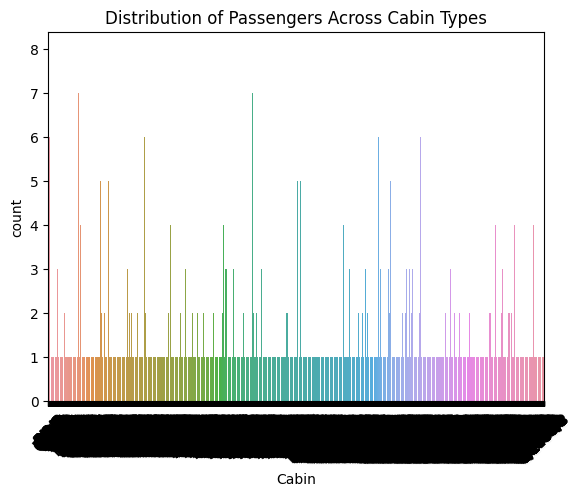

In [38]:
sns.countplot(data=train, x='Cabin')
plt.title('Distribution of Passengers Across Cabin Types')
plt.xticks(rotation=45)
plt.show()


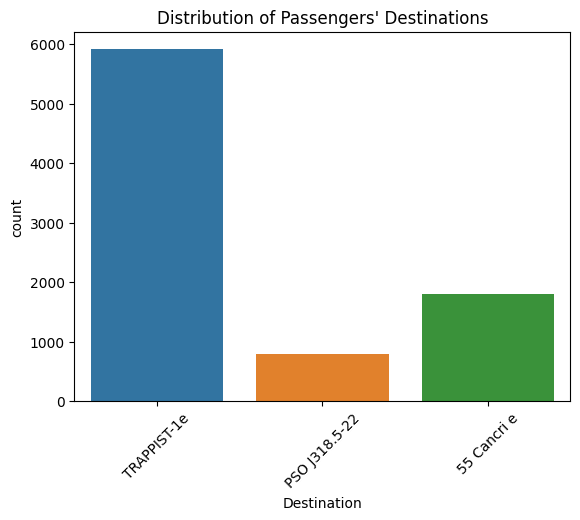

In [39]:
sns.countplot(data=train, x='Destination')
plt.title('Distribution of Passengers\' Destinations')
plt.xticks(rotation=45)
plt.show()


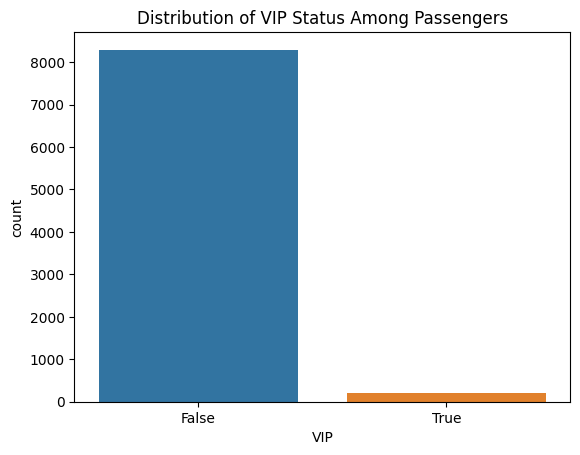

In [40]:
sns.countplot(data=train, x='VIP')
plt.title('Distribution of VIP Status Among Passengers')
plt.show()


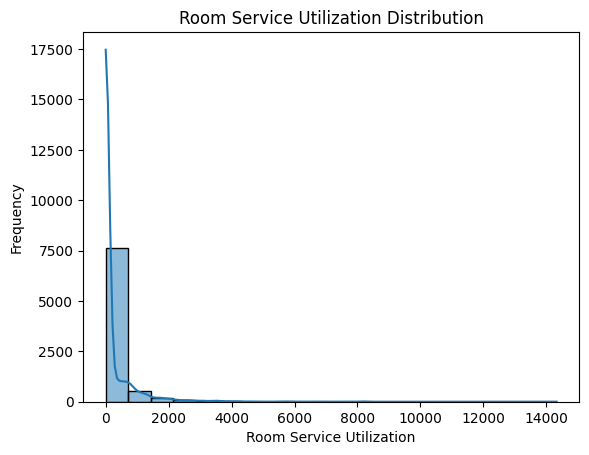

In [41]:
sns.histplot(train['RoomService'].dropna(), bins=20, kde=True)
plt.title('Room Service Utilization Distribution')
plt.xlabel('Room Service Utilization')
plt.ylabel('Frequency')
plt.show()


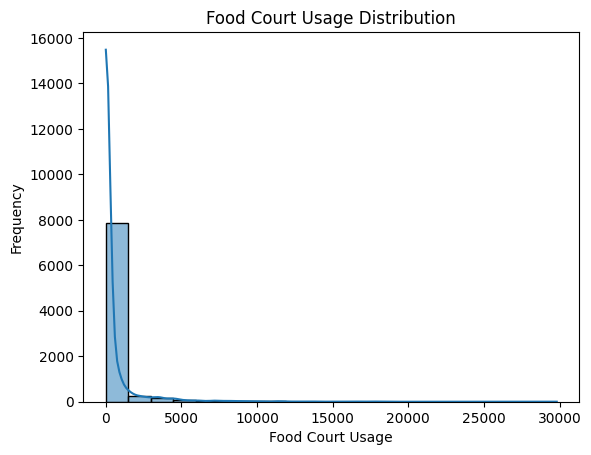

In [42]:
sns.histplot(train['FoodCourt'].dropna(), bins=20, kde=True)
plt.title('Food Court Usage Distribution')
plt.xlabel('Food Court Usage')
plt.ylabel('Frequency')
plt.show()


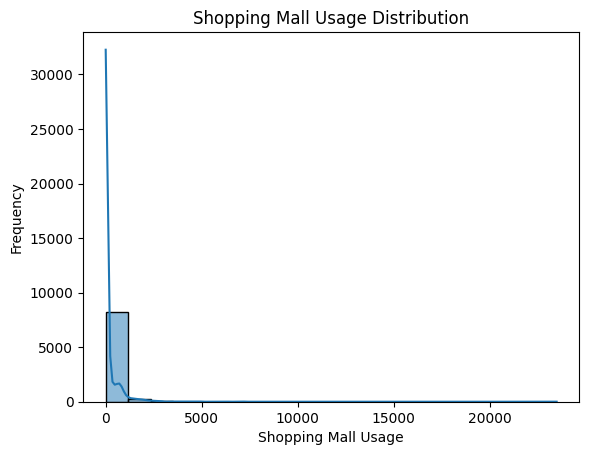

In [43]:
sns.histplot(train['ShoppingMall'].dropna(), bins=20, kde=True)
plt.title('Shopping Mall Usage Distribution')
plt.xlabel('Shopping Mall Usage')
plt.ylabel('Frequency')
plt.show()


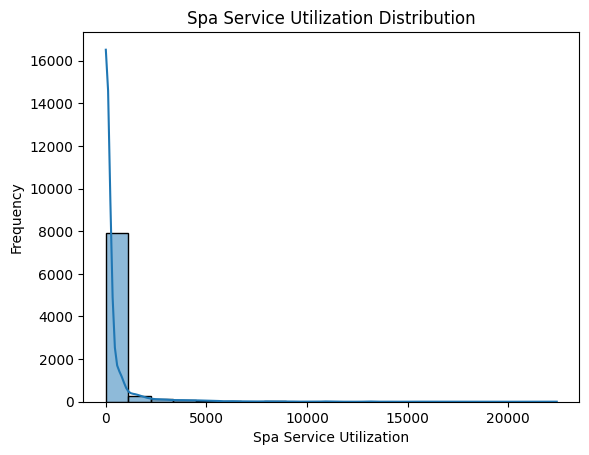

In [44]:
sns.histplot(train['Spa'].dropna(), bins=20, kde=True)
plt.title('Spa Service Utilization Distribution')
plt.xlabel('Spa Service Utilization')
plt.ylabel('Frequency')
plt.show()


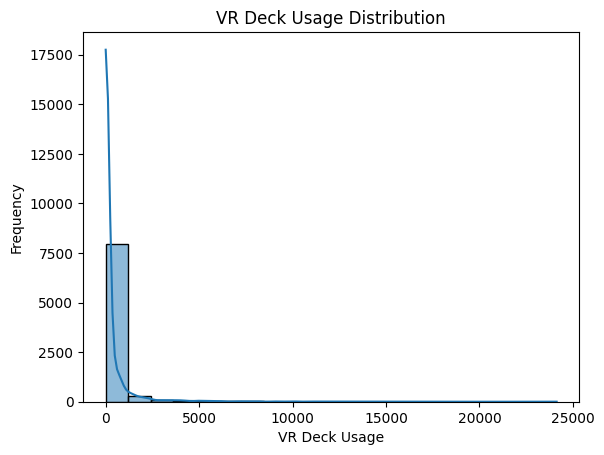

In [45]:
sns.histplot(train['VRDeck'].dropna(), bins=20, kde=True)
plt.title('VR Deck Usage Distribution')
plt.xlabel('VR Deck Usage')
plt.ylabel('Frequency')
plt.show()


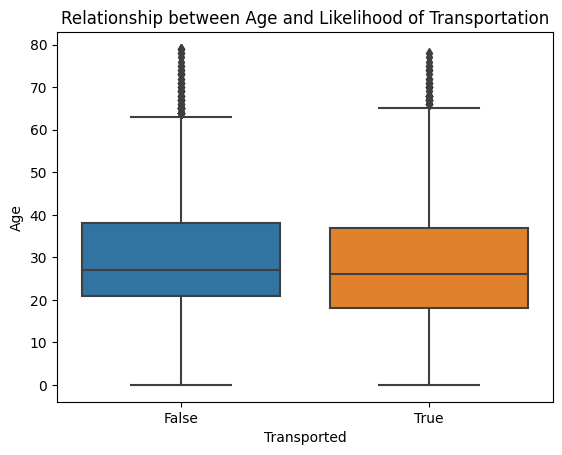

In [46]:
sns.boxplot(data=train, x='Transported', y='Age')
plt.title('Relationship between Age and Likelihood of Transportation')
plt.xlabel('Transported')
plt.ylabel('Age')
plt.show()


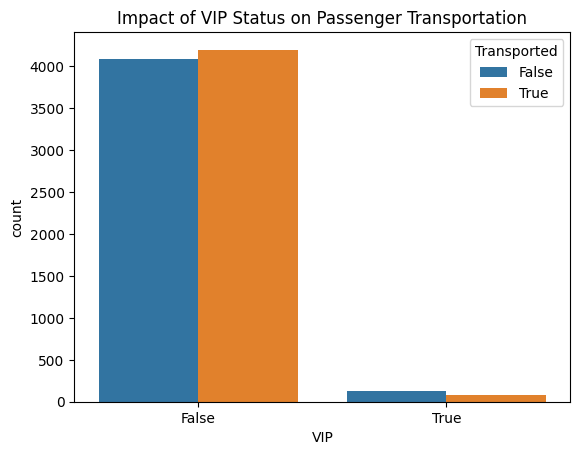

In [47]:
sns.countplot(data=train, x='VIP', hue='Transported')
plt.title('Impact of VIP Status on Passenger Transportation')
plt.show()


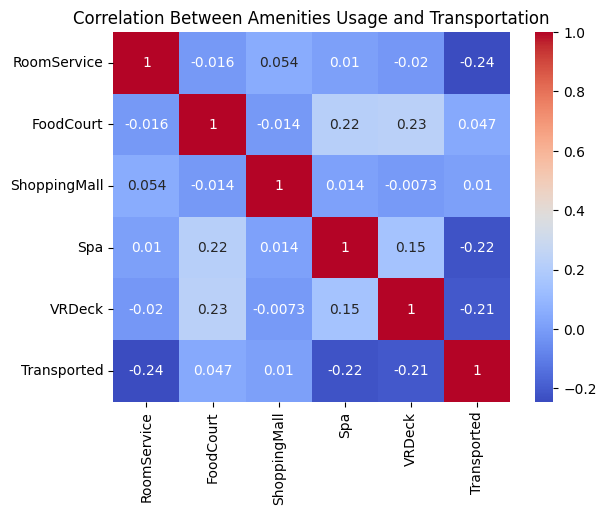

In [48]:
amenities = ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
corr_df = train[amenities + ['Transported']].corr()
sns.heatmap(corr_df, annot=True, cmap='coolwarm')
plt.title('Correlation Between Amenities Usage and Transportation')
plt.show()


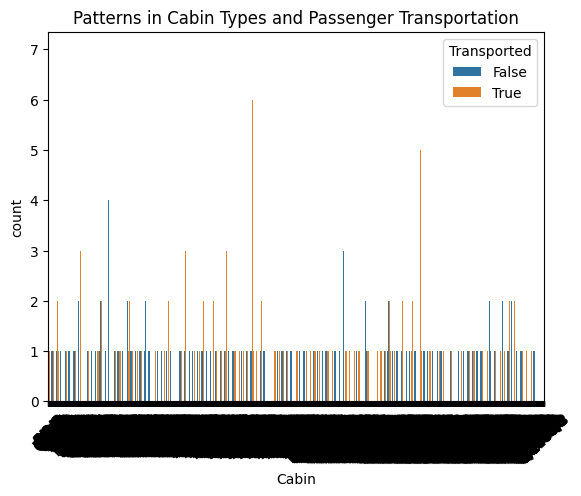

In [49]:
sns.countplot(data=train, x='Cabin', hue='Transported')
plt.title('Patterns in Cabin Types and Passenger Transportation')
plt.xticks(rotation=45)
plt.show()
